<a href="https://colab.research.google.com/github/kamini27singh/WineRecommender/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Loading Dataset 2022 Main Table in python
missing_values = ["Unknown", "No reply", "NaN"]
# Since data is not very clean and has missing values thus we are replacing missing values with "Unknown", "No reply", "NaN" values and skipping data lines which are creating errors
df_wine = pd.read_csv("wine_enthusiast_dataset.csv", na_values = missing_values,on_bad_lines='skip',encoding='utf8')
df_wine.index = np.arange(1, len(df_wine) + 1)
#Shape of the data
print("shape of the data is",df_wine.shape)

shape of the data is (130147, 14)


In [ ]:
#Quick glimpse of the data
df_wine.head()

,wine_id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,64661,US,"This is a simple Chardonnay, ripe and jammy in...",Laguna Ranch Vineyard,83,15.0,California,Russian River Valley,Sonoma,NaN,NaN,Laguna 2009 Laguna Ranch Vineyard Chardonnay (...,Chardonnay,Laguna
2,58524,France,This wine offers pure fruit flavors of crisp l...,Les Tillets,92,100.0,Burgundy,Meursault,NaN,Roger Voss,@vossroger,Domaine Pierre Labet 2013 Les Tillets (Meursa...,Chardonnay,Domaine Pierre Labet
3,120574,France,This clos within a clos has produced a crisp r...,Clos du Clos Genet,88,32.0,Burgundy,Santenay,NaN,Roger Voss,@vossroger,Domaine Jessiaume 2015 Clos du Clos Genet (Sa...,Pinot Noir,Domaine Jessiaume
4,49487,US,"This is powerful wine made at a high level, a ...",Stagecoach Vineyard Synchrony,92,135.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Krupp Brothers 2013 Stagecoach Vineyard Synchr...,Bordeaux-style Red Blend,Krupp Brothers
5,269,Austria,"Smooth and ripe, this is a rich black-fruited ...",NaN,89,17.0,Leithaberg,NaN,NaN,Roger Voss,@vossroger,Mariell 2009 BlaufrÃƒÆ’Ã‚Â¤nkisch (Leithaberg),BlaufrÃƒÆ’Ã‚Â¤nkisch,Mariell


In [ ]:
#Identify duplicate rows in 'wine_id' column because it is a primary key and should not contain a duplicate value
duplicateRows = df_wine[df_wine.duplicated(['wine_id'])]
#View duplicate rows, there are no duplicate values present in this column
print(duplicateRows)

Empty DataFrame
Columns: [wine_id, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery]
Index: []


In [ ]:
#Checking if data type and null status of columns
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130147 entries, 1 to 130147
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   wine_id                130147 non-null  int64  
 1   country                130084 non-null  object 
 2   description            130147 non-null  object 
 3   designation            92682 non-null   object 
 4   points                 130147 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               130084 non-null  object 
 7   region_1               108900 non-null  object 
 8   region_2               50687 non-null   object 
 9   taster_name            103903 non-null  object 
 10  taster_twitter_handle  98934 non-null   object 
 11  title                  130147 non-null  object 
 12  variety                130146 non-null  object 
 13  winery                 130147 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
# Looking at the proportion of missing data
print("Missing values distribution: ")
print(df_wine.isnull().mean()*100)
print("")

Missing values distribution: 
wine_id                   0.000000
country                   0.048407
description               0.000000
designation              28.786680
points                    0.000000
price                     7.047416
province                  0.048407
region_1                 16.325386
region_2                 61.054039
taster_name              20.164890
taster_twitter_handle    23.982881
title                     0.000000
variety                   0.000768
winery                    0.000000
dtype: float64



In [ ]:
# dropping 'region_2' and 'taster_twitter_handle column since it has missing data and it is not important to the analysis
df_wine=df_wine.drop(['region_2','taster_twitter_handle'], axis=1)

In [ ]:
# Replace string columns NaN values with "No Value"
# Names of the columns
columns = ['country','designation','province','region_1','taster_name','variety','winery']

# Looping through the columns to fill the entries with "No value"
for column in columns:
    df_wine[column] = df_wine[column].fillna("No Value")

In [ ]:
# Imputing price column with KNN Imputer
from sklearn.impute import KNNImputer

#Define a subset of the dataset
df_knn = df_wine.filter(['price'], axis=1).copy()

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_wine['price']=df_knn_imputed

In [ ]:
#Removing data which has points greater than 100, because it has invalid entries in all rows and as per description points can range from 1 to 100
df_wine = df_wine[df_wine.points <= 100]
df_wine = df_wine[df_wine.points > 0]

In [ ]:
#Looking at the final Data before starting analysis
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 1 to 130147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   wine_id      129971 non-null  int64  
 1   country      129971 non-null  object 
 2   description  129971 non-null  object 
 3   designation  129971 non-null  object 
 4   points       129971 non-null  int64  
 5   price        129970 non-null  float64
 6   province     129971 non-null  object 
 7   region_1     129971 non-null  object 
 8   taster_name  129971 non-null  object 
 9   title        129971 non-null  object 
 10  variety      129971 non-null  object 
 11  winery       129971 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 12.9+ MB


### **1.	Which vineyard produces the best wine?**
Doing this analysis on the basis of points columns and winery column in dataframe.

In [ ]:
x_winery=df_wine.groupby("winery").mean().sort_values(by="points",ascending=False).points.index[:5]
y_points=df_wine.groupby("winery").mean().sort_values(by="points",ascending=False).points.values[:5]

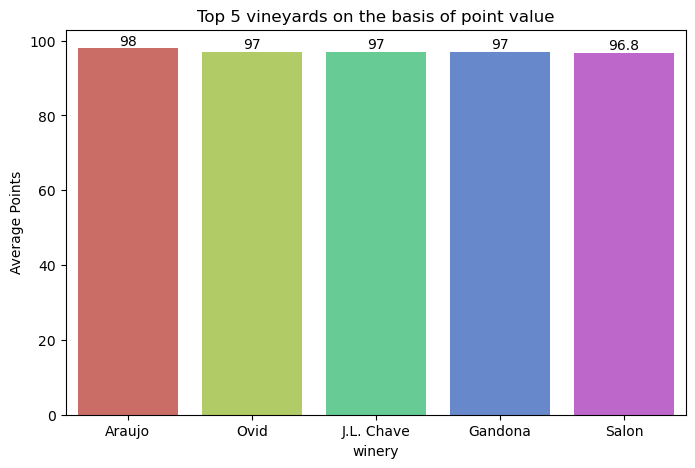

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel("Winery Names")
plt.ylabel("Average Points")
plt.title("Top 5 vineyards on the basis of point value")

ax=sns.barplot(x=x_winery,y=y_points, palette = 'hls')
for i in ax.containers:
    ax.bar_label(i,)

### **2.	If you had to pick 3 wines to recommend using only this data, which would you pick?**

In [ ]:
top3Points = df_wine.sort_values(by="points", ascending=False).head(3)
top3Points= top3Points[['points','title','country']]
top3Points

,points,title,country
6653,100,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Italy
120788,100,Charles Smith 2006 Royal City Syrah (Columbia ...,US
117864,100,Krug 2002 Brut (Champagne),France


Text(0.5, 1.0, 'Top 3 Expensive wine and their point value')

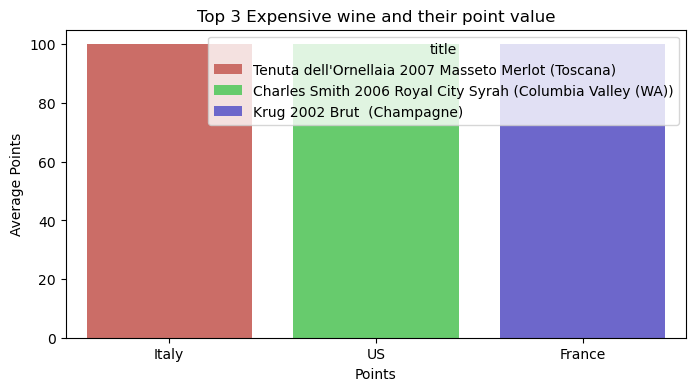

In [ ]:
#Plotting figure for top 3 wine with point value and country
plt.figure(figsize=(8,4))
ax=sns.barplot(x=top3Points['country'],y=top3Points['points'], palette = 'hls',hue=top3Points['title'],dodge=False)
plt.xlabel("Points")
plt.ylabel("Average Points")
plt.title("Top 3 Expensive wine and their point value")

In [ ]:
top3price = df_wine.sort_values(by="price", ascending=False).head(3)
top3price= top3price[['price','title','points']]
top3price

,price,title,points
123793,3300.0,Marchesato degli Aleramici 2012 Brunello di M...,90
63914,2500.0,ChÃƒÆ’Ã‚Â¢teau Saint Ahon 2011 Haut-MÃƒÆ’Ã‚Â©doc,88
103977,2500.0,Trinity Hill 2013 Sauvignon Blanc (New Zealand),87


Text(0.5, 1.0, 'Top 3 Expensive wine and their point value')

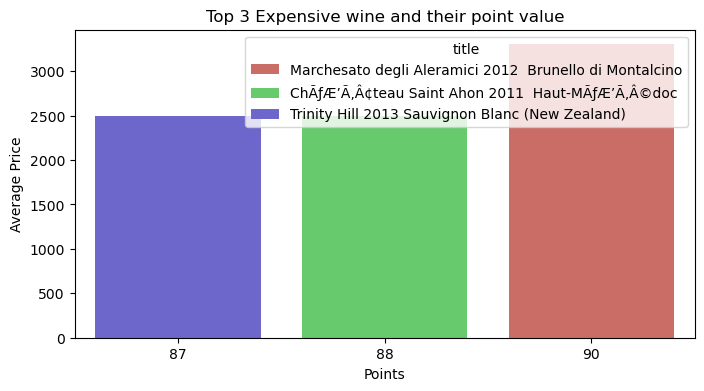

In [ ]:
#Plotting figure for top 3 expensive wine and their points value
plt.figure(figsize=(8,4))
ax=sns.barplot(x=top3price['points'],y=top3price['price'], palette = 'hls',hue=top3price['title'],dodge=False)
plt.xlabel("Points")
plt.ylabel("Average Price")
plt.title("Top 3 Expensive wine and their point value")

In [ ]:
Bottom3Price = df_wine.sort_values(by="price", ascending=True).head(3)
Bottom3Price= Bottom3Price[['price','title','points']]
Bottom3Price

,price,title,points
64054,4.0,Rocca di Castagnoli 2013 Chianti Classico,90
1184,4.0,Allimant-Laugner 2015 Riesling (Alsace),89
54306,4.0,Mil Piedras 2013 Viognier (Vista Flores),86


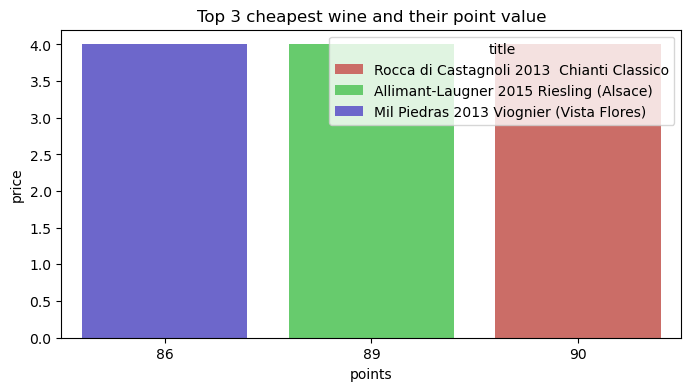

In [ ]:
#Plotting figure for cheapest wine and their points value
plt.figure(figsize=(8,4))
plt.xlabel("Title")
plt.ylabel("Average Price")
plt.title("Top 3 cheapest wine and their point value")

ax=sns.barplot(x=Bottom3Price['points'],y=Bottom3Price['price'], palette = 'hls',hue=Bottom3Price['title'],dodge=False)

In [ ]:
province_wine=[]
title_wine=[]
x_pp=df_wine.groupby(["province","title"]).mean().sort_values(by="points",ascending=False).points.index[:3]
province_wine=[x_pl[0][0],x_pl[1][0],x_pl[2][0]]
title_wine=[x_pl[0][1],x_pl[1][1],x_pl[2][1]]
y_pp=list(df_wine.groupby(["province","title"]).mean().sort_values(by="points",ascending=False).points.values[:3])

In [ ]:
# dictionary of lists
dict = {'province_wine': province_wine, 'title_wine': title_wine, 'points': y_pl}
df_province = pd.DataFrame(dict)
df_province

,province_wine,title_wine,points
0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,100.0
1,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,100.0
2,Port,Quinta do Noval 2011 Nacional Vintage (Port),100.0


Text(0.5, 1.0, 'Top 3 Province With Highest Point Value & Wine Title')

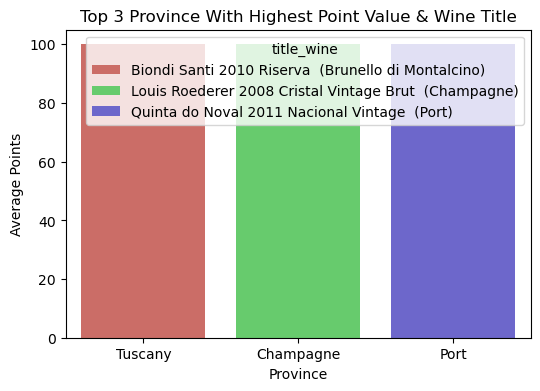

In [ ]:
#Plotting figure for top 3 Province With Highest Point Value & Wine Title
plt.figure(figsize=(6,4))

ax=sns.barplot(x=df_province['province_wine'],y=df_province['points'], palette = 'hls',hue=df_province['title_wine'],dodge=False)
plt.xlabel("Province")
plt.ylabel("Average Points")
plt.title("Top 3 Province With Highest Point Value & Wine Title")

### **3.	Which of the factors (price, country, variety, taster) are most important in determining the overall score of a wine?**

In [ ]:
# A quick glimpse at the dataset
df_wine.head()

,wine_id,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
1,64661,US,"This is a simple Chardonnay, ripe and jammy in...",Laguna Ranch Vineyard,83,100.0,California,Russian River Valley,No Value,Laguna 2009 Laguna Ranch Vineyard Chardonnay (...,Chardonnay,Laguna
2,58524,France,This wine offers pure fruit flavors of crisp l...,Les Tillets,92,32.0,Burgundy,Meursault,Roger Voss,Domaine Pierre Labet 2013 Les Tillets (Meursa...,Chardonnay,Domaine Pierre Labet
3,120574,France,This clos within a clos has produced a crisp r...,Clos du Clos Genet,88,135.0,Burgundy,Santenay,Roger Voss,Domaine Jessiaume 2015 Clos du Clos Genet (Sa...,Pinot Noir,Domaine Jessiaume
4,49487,US,"This is powerful wine made at a high level, a ...",Stagecoach Vineyard Synchrony,92,17.0,California,Napa Valley,Virginie Boone,Krupp Brothers 2013 Stagecoach Vineyard Synchr...,Bordeaux-style Red Blend,Krupp Brothers
5,269,Austria,"Smooth and ripe, this is a rich black-fruited ...",No Value,89,36.0,Leithaberg,No Value,Roger Voss,Mariell 2009 BlaufrÃƒÆ’Ã‚Â¤nkisch (Leithaberg),BlaufrÃƒÆ’Ã‚Â¤nkisch,Mariell


In [ ]:
df_wine_imp=df_wine.drop(['title','description','wine_id'], axis=1)

In [ ]:
df_wine_imp.head()

,country,designation,points,price,province,region_1,taster_name,variety,winery
1,US,Laguna Ranch Vineyard,83,100.0,California,Russian River Valley,No Value,Chardonnay,Laguna
2,France,Les Tillets,92,32.0,Burgundy,Meursault,Roger Voss,Chardonnay,Domaine Pierre Labet
3,France,Clos du Clos Genet,88,135.0,Burgundy,Santenay,Roger Voss,Pinot Noir,Domaine Jessiaume
4,US,Stagecoach Vineyard Synchrony,92,17.0,California,Napa Valley,Virginie Boone,Bordeaux-style Red Blend,Krupp Brothers
5,Austria,No Value,89,36.0,Leithaberg,No Value,Roger Voss,BlaufrÃƒÆ’Ã‚Â¤nkisch,Mariell


In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
l_country = le.fit_transform(df_wine_imp['country'])
l_designation = le.fit_transform(df_wine_imp['designation'])
l_province = le.fit_transform(df_wine_imp['province'])
l_region_1 = le.fit_transform(df_wine_imp['region_1'])
l_taster_name = le.fit_transform(df_wine_imp['taster_name'])
l_variety = le.fit_transform(df_wine_imp['variety'])
l_winery = le.fit_transform(df_wine_imp['winery'])

In [ ]:
# Assign encoded values to dataframe back
df_wine_imp["country"] = l_country
df_wine_imp['designation'] = l_designation
df_wine_imp["province"]= l_province
df_wine_imp['region_1']= l_region_1
df_wine_imp["taster_name"]= l_taster_name
df_wine_imp["variety"]= l_variety
df_wine_imp["winery"]= l_winery

# printing Dataframe
df_wine_imp.head()

,country,designation,points,price,province,region_1,taster_name,variety,winery
1,41,18530,83,100.0,51,912,14,125,9687
2,15,20078,92,32.0,47,638,16,125,6084
3,15,7395,88,135.0,47,975,16,441,5981
4,41,31809,92,17.0,51,746,19,62,9382
5,3,23536,89,36.0,185,769,16,56,10641


In [ ]:
#Droppiing any null value
df_wine_imp = df_wine_imp.dropna()
df_wine_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129970 entries, 1 to 130146
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129970 non-null  int32  
 1   designation  129970 non-null  int32  
 2   points       129970 non-null  int64  
 3   price        129970 non-null  float64
 4   province     129970 non-null  int32  
 5   region_1     129970 non-null  int32  
 6   taster_name  129970 non-null  int32  
 7   variety      129970 non-null  int32  
 8   winery       129970 non-null  int32  
dtypes: float64(1), int32(7), int64(1)
memory usage: 6.4 MB


In [ ]:
pip install xgboost


     ---------------------------------------- 89.1/89.1 MB 1.1 MB/s eta 0:00:00


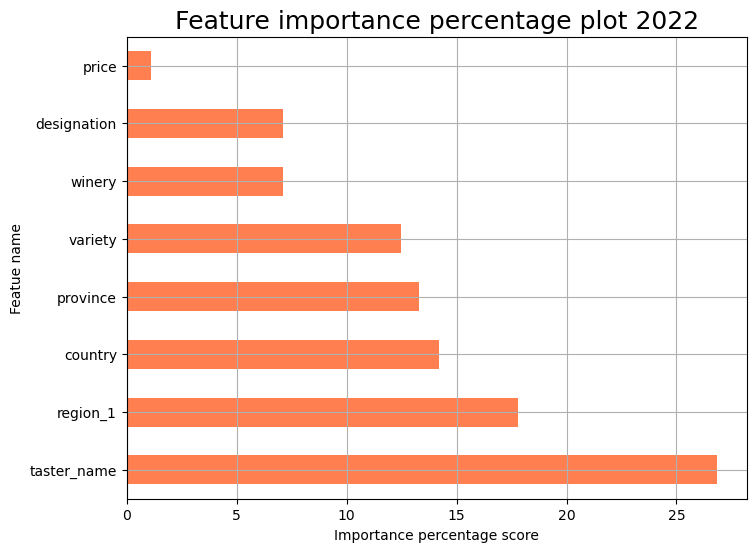

country        14.217271
designation     7.124042
price           1.119231
province       13.288969
region_1       17.801472
taster_name    26.847305
variety        12.470322
winery          7.131390
dtype: float32


<Figure size 640x480 with 0 Axes>

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
y=df_wine_imp['points']
X=df_wine_imp.drop('points', axis=1)

# Define the model

model = XGBRegressor()
# Fit the model
model.fit(X, y)
plt.figure(figsize=(8,6))
# Calculating feature importance with XGBRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()

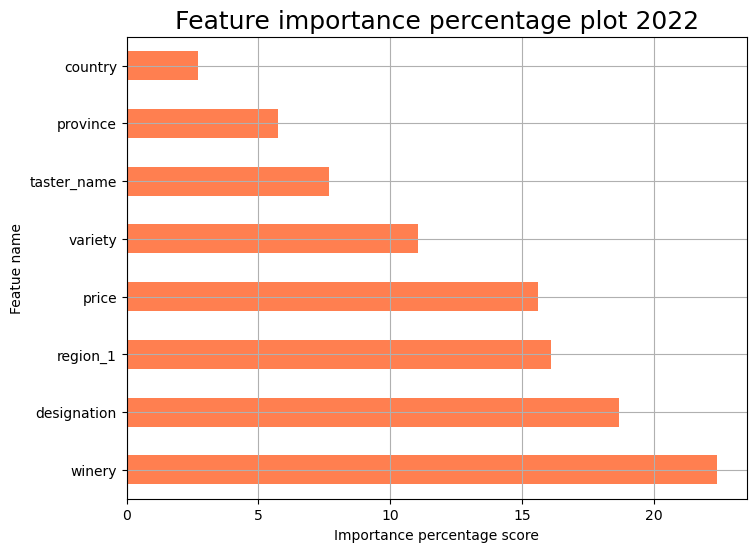

country         2.710166
designation    18.690936
price          15.603980
province        5.746738
region_1       16.120757
taster_name     7.671721
variety        11.049433
winery         22.406270
dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
model = RandomForestRegressor()
# Fit the model
model.fit(X, y)
plt.figure(figsize=(8,6))
# Calculating feature importance with XGBRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()

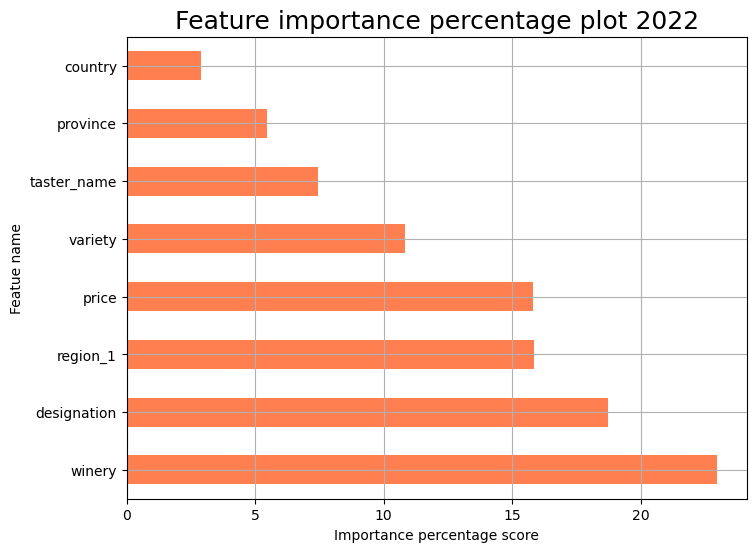

country         2.909358
designation    18.718867
price          15.819456
province        5.446825
region_1       15.836296
taster_name     7.451621
variety        10.844503
winery         22.973074
dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
model = DecisionTreeRegressor()
# Fit the model
model.fit(X, y)
plt.figure(figsize=(8,6))
# Calculating feature importance with XGBRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#Defining machine learning models
model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()
model3 = XGBRegressor()

# Fitting machine learnning models
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
# Predicting y_pred values with fitted models
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)

In [ ]:
# Calculating r2 score metric for all models
from sklearn.metrics import r2_score
print("DecisionTreeRegressor r2 score is",r2_score(y_test,y_pred_1))
print("RandomForestRegressor r2 score is",r2_score(y_test,y_pred_2))
print("XGBRegressor r2 score is",r2_score(y_test,y_pred_3))

DecisionTreeRegressor r2 score is -0.06393371412852833
RandomForestRegressor r2 score is 0.4161814493356598
XGBRegressor r2 score is 0.36660622162684364


In [ ]:
from sklearn.metrics import mean_squared_error
print("DecisionTreeRegressor mse is",mean_squared_error(y_test,y_pred_1))
print("RandomForestRegressor mse is",mean_squared_error(y_test,y_pred_2))
print("XGBRegressor mse is",mean_squared_error(y_test,y_pred_3))

DecisionTreeRegressor mse is 9.66352277876091
RandomForestRegressor mse is 5.302721201601552
XGBRegressor mse is 5.753004274564245


### **4.	Lastly, if I typically enjoy a wine which is “dry” and has “citrus” flavours, which variety of wine should I try?**

In [ ]:
df_wine['test']=df_wine['description'].str.contains(r'^(?=.*dry)(?=.*citrus)', regex=True)

In [ ]:
df_wine.loc[df_wine['wine_id'] == 92246]

,wine_id,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,test
188,92246,Portugal,"This is an impressive wine, full of rich fruit...",Quinta do Cardo SelecÃƒÆ’Ã‚Â§ÃƒÆ’Ã‚Â£o do EnÃƒ...,93,72.0,Beira Interior,No Value,Roger Voss,Companhia das Quintas 2010 Quinta do Cardo Sel...,Portuguese Red,Companhia das Quintas,False
